https://pythonnumericalmethods.berkeley.edu/notebooks/chapter23.03-Finite-Difference-Method.html
http://www.mitht.rssi.ru/it/pdf/cm/4_kraj.pdf

2. Вычисление параметров pi, qi, fi в узловых точках.
3. Составление системы ур-ний (11).
4. Составление 0-го и n-го уравнений.
5. Удаление переменных и преобразование 0-го и n-го уравнений (раздел 3).
6. Решение СЛАУ  (метод прогонки).
7. Анализ устойчивости. Надо просчитать задачу для n и для 2n узлов, так, чтобы различия в общих узлах составляли не более 1%.

## Краевые условия
c1y(a) + c2y'(a) = c
d1y(b) + d2y'(b) = d

_альтернативный вид_
a0y(a) + a1y'(a) = 0
b0y(b) + b1y'(b) = 0


## Задача
дифур y'' + y = 1;
краевые условия:    y(0) = 0;   y(pi) = 0;
отсюда
p = 0, q = 1, f = 1
c1 = 1, c = 0;
d1 = 1, d = 0;

На [a, b] ввести сетку с шагом h = (b - a) / n
x0 = a; xn = b; xi = x0 + ih = xi-1 + h;      yi ~ y(xi) - точное решение

In [17]:
import numpy as np

def diff(y):
    return 1 - y

p = 0
q = 1
f = 1
c1 = 1
c = 0
d1 = 1
d = 0

a = 0
b = np.pi

# шаги
h = 0.1
n = int(np.floor((b - a) / h))


In [18]:
import math

A = np.zeros((n + 1, n + 1))
A[0, 0] = c1 * h # - вот тут хз какие коэф засунуть для первого ур-я
A[n, n] = d1 * h + 0 # - вот тут хз какие коэф засунуть для последнего ур-я

# коэф для yi-1
def get_first():
    return 1 - (h * p)/2

# коэф для yi
def get_second():
    return -(2 - math.pow(h, 2) * q)

# коэф для yi+1
def get_third():
    return 1 + (h * p)/2

for i in range(n):
    if i == 0: continue
    A[i, i - 1] = get_first()
    A[i, i] = get_second()
    A[i, i + 1] = get_third()

B = np.zeros(n + 1)
B[1: -1] = -math.pow(h, 2) ## тут типа коэф h^2 * f для i = 1, 2, 3
B[-1] = 0 # надо какой-то для последнего вставить

In [19]:
Y = np.linalg.solve(A, B)
t = np.linspace(-10, 10, n + 1)
print(Y)

[3.44613227e-13 4.95095857e+00 9.84240755e+00 1.46254325e+01
 1.92522030e+01 2.36764516e+01 2.78539356e+01 3.17428803e+01
 3.53043962e+01 3.85028681e+01 4.13063113e+01 4.36866915e+01
 4.56202047e+01 4.70875158e+01 4.80739518e+01 4.85696483e+01
 4.85696483e+01 4.80739518e+01 4.70875158e+01 4.56202047e+01
 4.36866915e+01 4.13063113e+01 3.85028681e+01 3.53043962e+01
 3.17428803e+01 2.78539356e+01 2.36764516e+01 1.92522030e+01
 1.46254325e+01 9.84240755e+00 4.95095857e+00 0.00000000e+00]


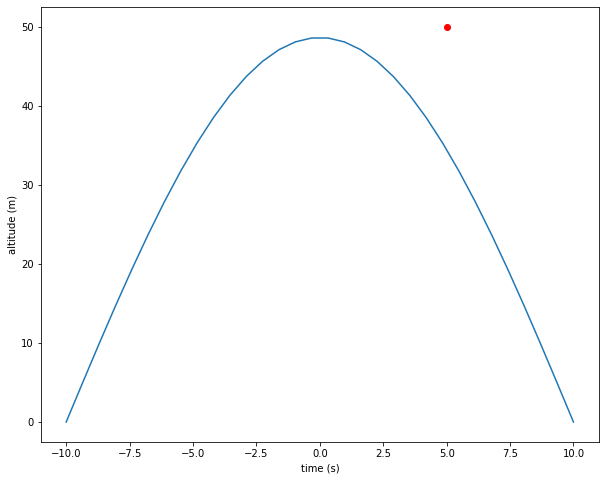

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.plot(t, Y)
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.show()